<a href="https://colab.research.google.com/github/abayro125/MAT494/blob/main/1_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**1.4 Principal Component Analysis**

A technique that is commonly used for dimensionality reduction via the projection of data points onto the first few principal components. This creates lower-dimensional data while perserving as much variation as possible. 

1.4.1 Singular Value Decomposition

Theorem 1.4.1 If an m×n matrix A has r nonzero singular values, σ1, ...,σr ≥0
with σr+1 = · · · =σn = 0, then the dimension of col(A) = r

Theorem 1.4.2 (The Singular Value Decomposition) Let A be an m×n matrix
with the dimension of col(A) = r. Then there exists an m×n matrix Σ, where
the diagonal entries in D are the first r singular values of A￿σ1 ≥σ2 ≥ · · · ≥
σr ≥0, and there exist an m×m orthogonal matrix U and an n×n orthogonal
matrix V such that
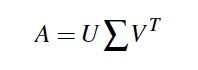

In [ ]:
# Singular-value decomposition
from numpy import array
from scipy.linalg import svd
# define a matrix
A = array([[1, 2], [3, 4], [5, 6]])
print("The A matrix is:", A)
print("\n")

# SVD
U, s, VT = svd(A)
print("After Singular Value Decomposition")
print("The U matrix is:",U) #prints the U matrix
print("\n")
print("The s matrix is:",s) #prints the s matrix
print("\n")
print("The VT matrix is:",VT) #prints the VT matrix

The A matrix is: [[1 2]
 [3 4]
 [5 6]]


After Singular Value Decomposition
The U matrix is: [[-0.2298477   0.88346102  0.40824829]
 [-0.52474482  0.24078249 -0.81649658]
 [-0.81964194 -0.40189603  0.40824829]]


The s matrix is: [9.52551809 0.51430058]


The VT matrix is: [[-0.61962948 -0.78489445]
 [-0.78489445  0.61962948]]


1.2.2 Low-Rank Matrix Approximations

Definition 1.4.3 (Induced Norm): The 2-norm of a matrix A ∈ Rn×m is
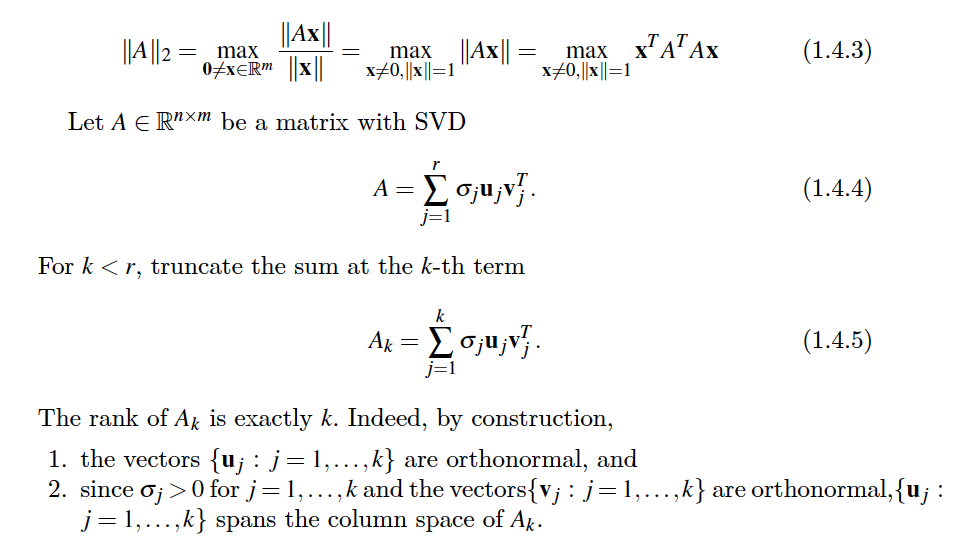

In [ ]:
import numpy as np
from numpy import linalg as LA

c = np.array([[ 1, 2, 3], #create a matrix for vector normalization
              [-1, 1, 4]])

norm1 = LA.norm(c, axis=0) #compute vector norm
print("The vector norm at axis = 0 is:", norm1)
norm2 = LA.norm(c, axis=1) #compute vector norm
print("The vector norm at axis = 1 is:", norm2)


The vector norm at axis = 0 is: [1.41421356 2.23606798 5.        ]
The vector norm at axis = 1 is: [3.74165739 4.24264069]


Lemma 1.4.4 (Matrix Norms and Singular Values): Let A ∈ Rn×m be a matrix
with SVD 
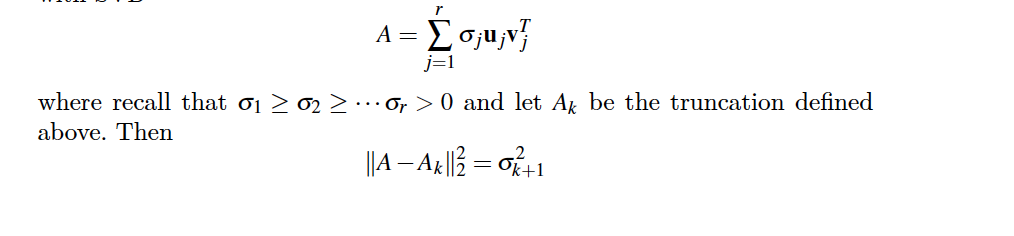

Theorem 1.4.5 (Eckart-Young-Mirsky theorem) (Low-Rank Approximation
in the Induced Norm): Let A ∈ Rn×m be a matrix with SVD
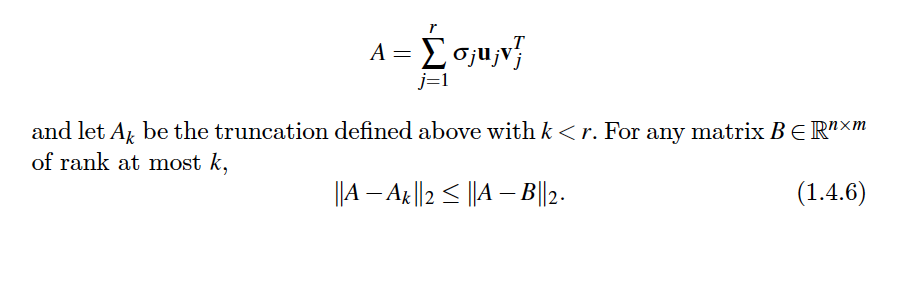

1.4.3 Principal Component Analysis

1.4.3.1 Covariance Matrix

The (sample) covariance matrix is the p× p matrix S defined by
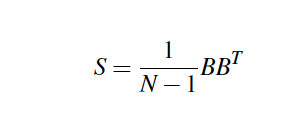

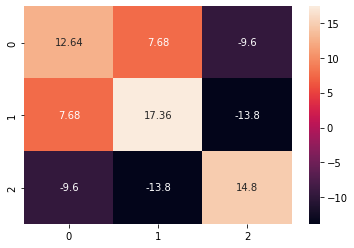

In [1]:
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt

A = [45,37,42,35,39] #vector A
B = [38,31,26,28,33] #vector B
C = [10,15,17,21,12] #vector C

data = np.array([A,B,C])

covMatrix = np.cov(data,bias=True) #creates a covariance matrix
sn.heatmap(covMatrix, annot=True, fmt='g') #displays covaraince matrix as a heatmap
plt.show()

1.4.3.2 Principal Component Analysis

Now assume that the columns of the p×N data matrix
X = [X1,X2, · · ·XN]
is already in mean-deviation from. 

The goal of principal component analysis
(PCA) is to find k, (k ≤ p) orthonormal vectors v1, ...,vk, (top k principal
components) that maximize the objective function

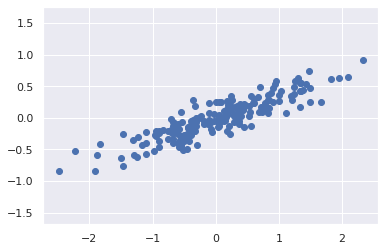

In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

rng = np.random.RandomState(1) #creates random points
X = np.dot(rng.rand(2, 2), rng.randn(2, 200)).T
plt.scatter(X[:, 0], X[:, 1])
plt.axis('equal');



In [3]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2) #determines top 2 principal components
pca.fit(X)

print(pca.components_) #prints the principal components

print(pca.explained_variance_) #prints the variance of each component

[[-0.94446029 -0.32862557]
 [-0.32862557  0.94446029]]
[0.7625315 0.0184779]


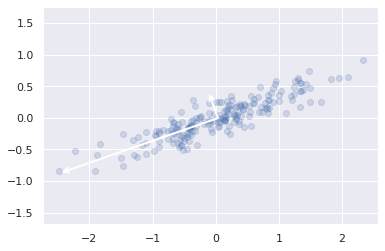

In [4]:
def draw_vector(v0, v1, ax=None):
    ax = ax or plt.gca()
    arrowprops=dict(arrowstyle='->',
                    linewidth=2,
                    shrinkA=0, shrinkB=0)
    ax.annotate('', v1, v0, arrowprops=arrowprops)

# plot data
plt.scatter(X[:, 0], X[:, 1], alpha=0.2)
for length, vector in zip(pca.explained_variance_, pca.components_):
    v = vector * 3 * np.sqrt(length)
    draw_vector(pca.mean_, pca.mean_ + v)
plt.axis('equal');

In [5]:
from sklearn.datasets import load_digits
digits = load_digits()
digits.data.shape

(1797, 64)

In [6]:
pca = PCA(2)  # project from 64 to 2 dimensions
projected = pca.fit_transform(digits.data)
print(digits.data.shape)
print(projected.shape)

(1797, 64)
(1797, 2)


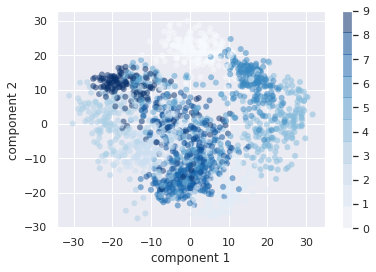

In [ ]:
plt.scatter(projected[:, 0], projected[:, 1],
            c=digits.target, edgecolor='none', alpha=0.5,
            cmap=plt.cm.get_cmap('Blues', 10))
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.colorbar(); #shows the principal components

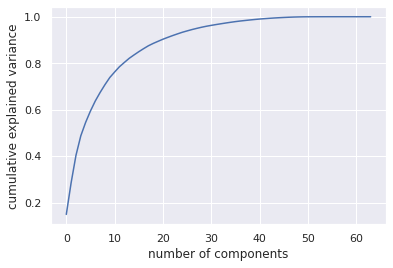

In [7]:
pca = PCA().fit(digits.data)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

1.4.3.3 Total Variance

Given the columns of the p×N data matrix and assume it is already in
mean-deviation from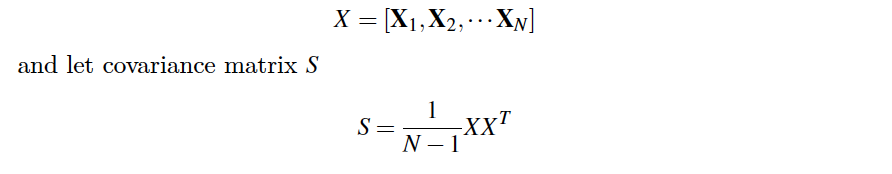